## 01. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#charts are displayed without needing to be called

%matplotlib inline

In [11]:
path = r'/Users/juliewhitton/Desktop/Personal Project/'

df_inc = pd.read_csv(os.path.join(path, 'Data', 'Final Data', 'incidents_final.csv'))
df_inc.head()                          

,incident_id,state,year,n_killed,n_injured,n_guns_involved,latitude,longitude,notes,inc_rate
0,95289,MI,2014,0,0,NaN,43.2301,-86.2514,bullets entered home,14.572227
1,92607,MI,2014,0,1,NaN,42.4142,-82.9582,NaN,14.572227
2,92602,MI,2014,2,2,NaN,42.3484,-83.0597,NaN,14.572227
3,92620,MI,2014,0,2,NaN,42.3756,-83.0643,2 men shot by drunk perp @ party.,14.572227
4,92612,MI,2014,0,1,NaN,42.3727,-83.1921,NaN,14.572227


In [12]:
df_2014 = df_inc.loc[(df_inc['year'] == 2014)].reset_index(drop = True)
df_2014.head()

,incident_id,state,year,n_killed,n_injured,n_guns_involved,latitude,longitude,notes,inc_rate
0,95289,MI,2014,0,0,NaN,43.2301,-86.2514,bullets entered home,14.572227
1,92607,MI,2014,0,1,NaN,42.4142,-82.9582,NaN,14.572227
2,92602,MI,2014,2,2,NaN,42.3484,-83.0597,NaN,14.572227
3,92620,MI,2014,0,2,NaN,42.3756,-83.0643,2 men shot by drunk perp @ party.,14.572227
4,92612,MI,2014,0,1,NaN,42.3727,-83.1921,NaN,14.572227


In [13]:
df_2014.shape

(51854, 10)

In [19]:
df_2014.isna().sum()

incident_id            0
state                  0
year                   0
n_killed               0
n_injured              0
n_guns_involved    46037
latitude             158
longitude            158
notes              16720
inc_rate               0
dtype: int64

In [21]:
#Drop NaN values from longitude col and reset index after drop
df_reg_14 = df_2014.dropna(subset = ['longitude']).reset_index(drop=True)
df_reg_14.shape

(51696, 10)

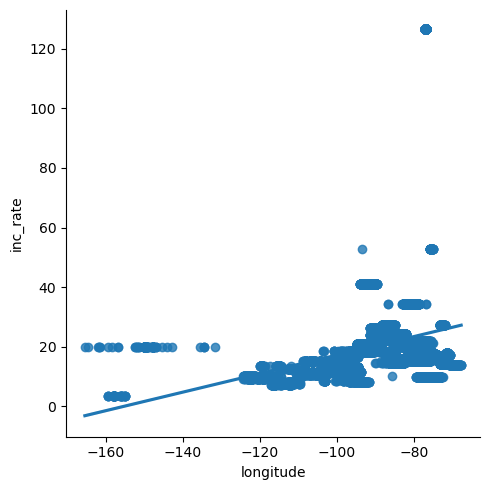

In [23]:
sns.lmplot(x = 'longitude', y = 'inc_rate', data = df_reg_14)

Hypothesis:
The incident rate increases from West to East across the United States.

In [24]:
#turn data into Numpy arrays

X = df_reg_14['longitude'].values.reshape(-1, 1)
y = df_reg_14['inc_rate'].values.reshape(-1, 1)

In [25]:
#create training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
#run regression

regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
#test for y values

y_predicted = regression.predict(X_test)

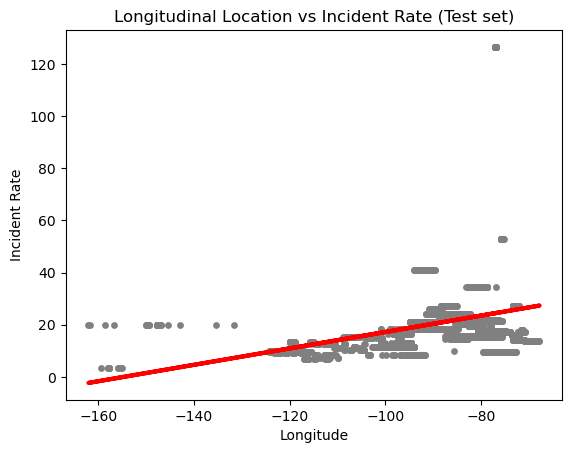

In [28]:
#create scatterplot to see results

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Longitudinal Location vs Incident Rate (Test set)')
plot_test.xlabel('Longitude')
plot_test.ylabel('Incident Rate')
plot_test.show()

At first glance, the line appears to fit the data fairly well.

In [30]:
#check model summary stats

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[0.31437135]]
Mean squared error:  219.16113572684725
R2 score:  0.07430848767683484


In [31]:
#Create a df to compare actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,9.669152,10.227959
1,20.409043,22.072654
2,26.216632,20.749277
3,18.244843,21.547717
4,21.003262,20.262975
5,15.811821,22.941671
6,15.317063,24.302302
7,19.276186,20.136598
8,41.042090,20.333300
9,11.619052,18.633589


The model did not do a very good job with the prediction values. I would be curious to see what would happen if I were to run the model on 2015-2017 data individually and then retry the 2014 data. I don't know if that's even possible. 
I haven't identified any potential biases inherent in this data, but there are several limitations of the data that definitely impact the results. 